# CA05-A-Logistic_Regression

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import seaborn as sns

## Load Data and Build the Model

In [2]:
df = pd.read_csv('https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv')
df.head()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


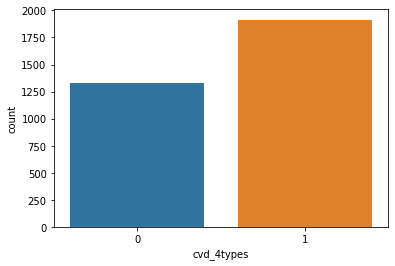

In [9]:
# See if we got an imbalanced data
sns.countplot(df['cvd_4types'])

In [3]:
# Split the data set by specify the size as 0.3
X_train, X_test, y_train, y_test = train_test_split(df.drop('cvd_4types',axis=1), df['cvd_4types'], test_size=0.3, random_state=42)

### Train the model without specify the hyperparameters

In [55]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

C:\Users\wuuj0\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6639260020554985

### Use GridSearch to find the best hyperparameter

In [49]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create penalty and solver space
solver = ['sag','lbfgs','newton-cg']

# Create hyperparameter options
random_state = [42]
hyperparameters = dict(C=C, solver=solver, random_state=random_state)

In [50]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(lr, hyperparameters, cv=5)

In [51]:
best_model = clf.fit(X_train, y_train)

C:\Users\wuuj0\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\wuuj0\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\wuuj0\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\wuuj0\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\wuuj0\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\Users\wuuj0\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\wuuj0\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\wuuj0\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\wuuj0\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\wuuj0\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\Users\wuuj0\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\wuuj0\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\wuuj0\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\wuuj0\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\wuuj0\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

In [54]:
# View best hyperparameters
print('Best Solver:', best_model.best_estimator_.get_params()['solver'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Solver: newton-cg
Best C: 1.0


### Re-train the model

In [4]:
lr = LogisticRegression(C=1, solver='newton-cg', random_state=42)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
acc = accuracy_score(y_test, y_pred)
# The accuracy did increase, but it isn't significant
acc

0.6700924974306269

### Feature Importance

In [7]:
lr.fit(X_train/np.std(X_train,0),y_train)
print(lr.coef_)

[[-0.01982562 -0.4297973   0.14805125 -0.1298806  -0.60231124 -0.16342931
   1.11182995 -0.19897409 -0.03212223 -0.10558642  0.05411031  0.13731963
   0.04451392 -0.06747502  0.16020593 -0.44354735]]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

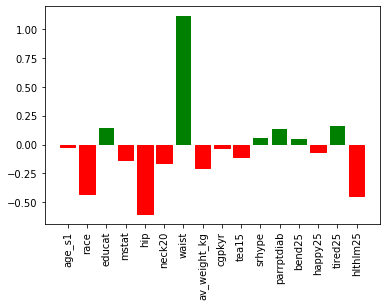

In [64]:
barlist = plt.bar(list(X_train.columns),lr.coef_[0],color='g')
for i,coef in enumerate(lr.coef_[0]):
    if coef<0:
        barlist[i].set_color('r')
    else: pass
plt.xticks(rotation=90)
# The green factors would increase the probability of being 1 and vice versa

### Model Evaluation

In [85]:
y_score = lr.predict_proba(X_test)[:,1]

Text(0, 0.5, 'True Positive Rate')

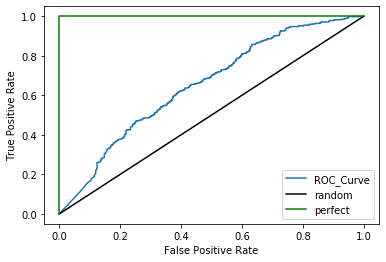

In [86]:
fp, tp, threshold = roc_curve(y_test, y_score)
plt.plot(fp, tp,label = 'ROC_Curve')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# The ROC curve is only a little bit better than the random line

In [87]:
auc_lr = roc_auc_score(y_test, y_score)
print("The AUC for the Logistic Regression is {}".format(round(auc_lr,4)))

The AUC for the Logistic Regression is 0.6528


# CA05-B-KNN

In [93]:
from sklearn.neighbors import NearestNeighbors

In [308]:
movie = pd.read_csv('https://github.com/ArinB/CA05-kNN/raw/master/movies_recommendation_data.csv')
movie.head()

,Movie ID,Movie Name,IMDB Rating,Biography,Drama,Thriller,Comedy,Crime,Mystery,History,Label
0,58,The Imitation Game,8.0,1,1,1,0,0,0,0,0
1,8,Ex Machina,7.7,0,1,0,0,0,1,0,0
2,46,A Beautiful Mind,8.2,1,1,0,0,0,0,0,0
3,62,Good Will Hunting,8.3,0,1,0,0,0,0,0,0
4,97,Forrest Gump,8.8,0,1,0,0,0,0,0,0


In [91]:
# get rid of unnecessary columns without destroying the original structure
df = movie.copy()
df.drop(['Movie ID', 'Movie Name', 'Label'], axis = 1,inplace = True)

### Build the recommendation and show the result

In [163]:
# The goal is to recommend five similiar movie, so the n_neighbors is 5
nbrs = NearestNeighbors(n_neighbors=5, algorithm='kd_tree').fit(df)

# Next we find k nearest neighbor for each point in df.
distances, indices = nbrs.kneighbors(df)

In [318]:
print(indices[:10])
# The first number in each array is their index
# Start from the second number would be their nearest neighbers' indices respectively

[[ 0  2 16 29 28]
 [ 1  6 21 18 10]
 [ 2 16 29 27 28]
 [ 3 12  4  6 18]
 [ 4 12  3 15 17]
 [ 5 10  9 21 18]
 [ 6 18 21 10  9]
 [ 7 20 10  9 18]
 [ 8 22 24 14 19]
 [ 9 10 18 21  6]]


In [309]:
def all_recommend(movie_df):
    mov_series = movie_df['Movie Name']
    whole_recommend = []
    for single_movie in indices:
        recomm_movie = []
        for recommend_indices in single_movie:
            movie_name = mov_series.iloc[recommend_indices]
            recomm_movie.append(movie_name)
        whole_recommend.append(recomm_movie)
    movie_dict = {}
    for movie_i in whole_recommend:
        movie = movie_i[0]
        recommendation = movie_i[1:]
        movie_dict[movie] = recommendation
    recommend_df = pd.DataFrame(movie_dict).transpose().rename(columns={0:'1st recommendation',1:'2nd recommendation',
                                                         2:'3rd recommendation',3:'4th recommendation'})
    return recommend_df

In [311]:
all_recommend(movie).head()

,1st recommendation,2nd recommendation,3rd recommendation,4th recommendation
The Imitation Game,A Beautiful Mind,The Wind Rises,Queen of Katwe,12 Years a Slave
Ex Machina,Gifted,Stand and Deliver,Finding Forrester,A Brilliant Young Mind
A Beautiful Mind,The Wind Rises,Queen of Katwe,Hacksaw Ridge,12 Years a Slave
Good Will Hunting,Interstellar,Forrest Gump,Gifted,Finding Forrester
Forrest Gump,Interstellar,Good Will Hunting,Inception,Spirited Away


In [312]:
# This function could allow you to search movies' recommendation
def search_recommend(movie_name):
    df = all_recommend(movie)
    return df.loc[movie_name,:]

In [317]:
search_recommend(['The Imitation Game','Ex Machina'])

,1st recommendation,2nd recommendation,3rd recommendation,4th recommendation
The Imitation Game,A Beautiful Mind,The Wind Rises,Queen of Katwe,12 Years a Slave
Ex Machina,Gifted,Stand and Deliver,Finding Forrester,A Brilliant Young Mind


### Recommendation for "The Post"

In [164]:
the_post = [7.2, 1, 1, 0, 0, 0, 0, 1]
distances_n, indices_n = nbrs.kneighbors([the_post])
print(indices_n)
# These are the five most nearest movies' indices
# Different from the indices above that start from the second number
# "The Post" is a new record that hasn't been trained in the fitted model
# Therefore, the first number is the 1st recommendation in the model instead of its index

[[28 27 29 16  2]]


In [260]:
def get_recommend(movie_feature_vector):       
    mov_series = movie['Movie Name']
    distances_n, indices_n = nbrs.kneighbors([movie_feature_vector])
    recommend_movie = []
    for i in indices_n[0]:
        movie_name = mov_series.iloc[i]
        recommend_movie.append(movie_name)
    return recommend_movie

In [269]:
get_recommend(the_post)

['12 Years a Slave',
 'Hacksaw Ridge',
 'Queen of Katwe',
 'The Wind Rises',
 'A Beautiful Mind']

In [268]:
for i,movie_n in enumerate(get_recommend(the_post)):
    # make i = i+1 so the i could start from 1 instead of 0
    i+=1
    print('The {} recommendation is {}'.format(i,movie_n))


The 1 recommendation is 12 Years a Slave
The 2 recommendation is Hacksaw Ridge
The 3 recommendation is Queen of Katwe
The 4 recommendation is The Wind Rises
The 5 recommendation is A Beautiful Mind
